In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics

In [3]:
movies=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/movies.dat", sep="::",names=['MovieID', 'Title', 'Genre'])


<ipython-input-3-a7ecb5d434f6>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/movies.dat", sep="::",names=['MovieID', 'Title', 'Genre'])


In [4]:
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/ratings.dat", sep="::",names=['UserID','MovieID','Rating','Timestamp'])

<ipython-input-5-493973f2eec5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/ratings.dat", sep="::",names=['UserID','MovieID','Rating','Timestamp'])


In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/users.dat", sep="::",names=['UserID','Gender','Age','Ocupation','Zip'])

<ipython-input-7-25eb12b38651>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users=pd.read_csv("/Users/maxpoliit/Downloads/Data science with Python 1/users.dat", sep="::",names=['UserID','Gender','Age','Ocupation','Zip'])


In [8]:
users.head()

,UserID,Gender,Age,Ocupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
userating=pd.merge(users,ratings,on='UserID')

In [10]:
useratingmovies=pd.merge(userating,movies,on='MovieID')

In [11]:
Master_Data=useratingmovies

In [12]:
Master_Data.head()

,UserID,Gender,Age,Ocupation,Zip,MovieID,Rating,Timestamp,Title,Genre
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [13]:
Master_Data1=Master_Data.drop(columns=['Zip','Timestamp','Title','Genre'])

In [14]:
Master_Data.isna().mean()*100

UserID       0.0
Gender       0.0
Age          0.0
Ocupation    0.0
Zip          0.0
MovieID      0.0
Rating       0.0
Timestamp    0.0
Title        0.0
Genre        0.0
dtype: float64

In [15]:
Master_Data1.head()

,UserID,Gender,Age,Ocupation,MovieID,Rating
0,1,F,1,10,1193,5
1,2,M,56,16,1193,5
2,12,M,25,12,1193,4
3,15,M,25,7,1193,4
4,17,M,50,1,1193,5


In [16]:
agedist=Master_Data['Age'].value_counts()

<AxesSubplot:>

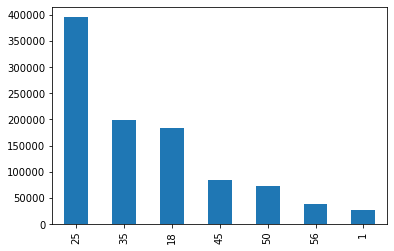

In [17]:
agedist.plot(kind='bar')

In [18]:
ratings_toy=pd.DataFrame(data=Master_Data, columns=['Rating','Title'])

In [19]:
ratings_toy.head()

,Rating,Title
0,5,One Flew Over the Cuckoo's Nest (1975)
1,5,One Flew Over the Cuckoo's Nest (1975)
2,4,One Flew Over the Cuckoo's Nest (1975)
3,4,One Flew Over the Cuckoo's Nest (1975)
4,5,One Flew Over the Cuckoo's Nest (1975)


In [20]:
ratings_toy=ratings_toy[ratings_toy['Title']=='Toy Story (1995)']

In [21]:
ratings_toy.head()

,Rating,Title
41626,5,Toy Story (1995)
41627,4,Toy Story (1995)
41628,4,Toy Story (1995)
41629,5,Toy Story (1995)
41630,5,Toy Story (1995)


<AxesSubplot:>

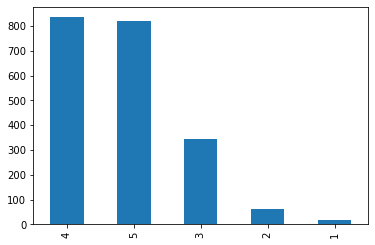

In [22]:
ratings_toy['Rating'].value_counts().plot(kind='bar')

In [23]:
Top_movies=Master_Data.groupby(['Title'])['Rating'].mean()

In [24]:
Top_movies=pd.DataFrame(Top_movies).reset_index()

In [25]:
Top_movies.sort_values(ascending=False, by=['Rating'])[:25]

,Title,Rating
3477,Ulysses (Ulisse) (1954),5.000000
2025,Lured (1947),5.000000
1203,Follow the Bitch (1998),5.000000
407,Bittersweet Motel (2000),5.000000
3087,Song of Freedom (1936),5.000000
2453,One Little Indian (1973),5.000000
3044,Smashing Time (1967),5.000000
2903,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1297,"Gate of Heavenly Peace, The (1995)",5.000000
249,"Baby, The (1973)",5.000000


In [26]:
User1=Master_Data[Master_Data['UserID']==2696]

<AxesSubplot:xlabel='Rating'>

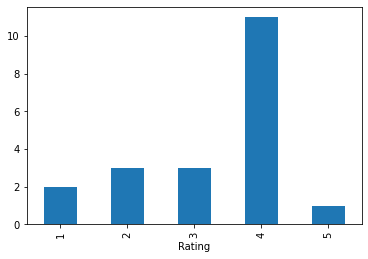

In [27]:
User1.groupby(['Rating']).size().plot(kind='bar')

In [169]:
genres=Master_Data['Genre'].unique()

In [170]:
genres

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [172]:
movie_ratings_selected_df = Master_Data[[
    'Gender',
    'Age',
    'Ocupation',
    'Rating',
    'Genre'
]]

In [173]:
Genre = movie_ratings_selected_df['Genre']

In [133]:
Genre = Genre.str.get_dummies().add_prefix('Genre_')

In [134]:
MD = pd.concat([movie_ratings_selected_df.drop(['Genre'],axis=1),
     Genre],
    axis=1,
    
)



In [153]:
MD=pd.get_dummies(MD, columns=['Gender'])

In [154]:
MD.head()

,Age,Ocupation,Rating,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western,Gender_F,Gender_M
0,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,56,16,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,25,12,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,25,7,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
x=MD.drop(columns='Rating',axis=1)

In [156]:
y=MD['Rating']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lr=LinearRegression()

In [161]:
lr.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred=lr.predict(x_test)

In [168]:
print(
    'y-intercept: ',
    lr.intercept_
)
print(
    'Beta coefficients: ',
    lr.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

y-intercept:  3.381301680648352
Beta coefficients:  [ 0.00391672  0.00105151 -0.09641039  0.01263625  0.36211647 -0.31559526
 -0.01165602  0.09498182  0.42807478  0.23512417  0.06591758  0.43932016
 -0.28529767  0.16566815  0.01487994 -0.00625741 -0.02416308  0.06179947
  0.29701786  0.12054586  0.0194575  -0.0194575 ]
Mean Abs Error  MAE:  0.9021481689960541
Mean Sq Error  MSE:  1.2039105570109343
Root Mean Sq Error RMSE: 1.0972285801103316
r2 value:  0.03701789298445857
